In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Function to create dignostic plots

In [4]:
def plotvariable(df, variable):
  plt.figure(figsize=(16,4))
  plt.subplot(1,2,1)
  plt.hist(df[variable], alpha=0.5)

  plt.subplot(1,2,2)
  sns.boxplot(df[variable])
  plt.show()

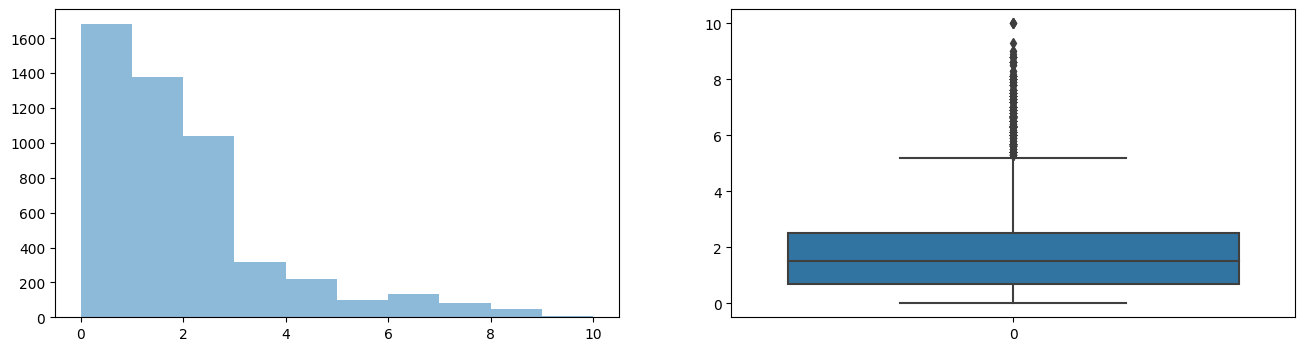

In [5]:
plotvariable(data, 'CCAvg')


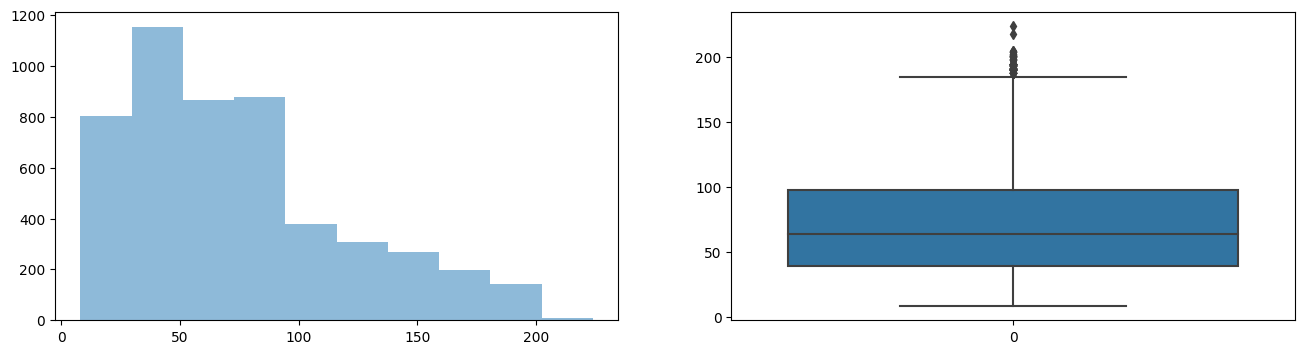

In [6]:
plotvariable(data, 'Income') 

In [7]:
def find_boundaries(df, variables):
  Q1 = df[variables].quantile(.25)
  Q3 = df[variables].quantile(.75)
  IQR = Q3 - Q1
  lower_boundary = Q1 - 1.5* IQR
  upper_boundary = Q3 + 1.5* IQR

  return lower_boundary, upper_boundary

### **upper and lower limits for CCAvg**

In [8]:
lower_CCAvg, upper_CCAvg = find_boundaries(data, 'CCAvg')
print('upper limit for CCAvg area is', upper_CCAvg)
print('lower limit for CCAvg area is', lower_CCAvg)

upper limit for CCAvg area is 5.2
lower limit for CCAvg area is -2.0


# Removing / Trimming the outliers

In [9]:
outliers_CCAvg = np.where(data['CCAvg'] > upper_CCAvg, True ,
                         np.where(data['CCAvg']< lower_CCAvg, True , False))

In [10]:
outliers_CCAvg

array([False, False, False, ..., False, False, False])

In [11]:
data.shape

(5000, 14)

In [12]:
engineered_data = data.loc[~(outliers_CCAvg)]

In [13]:
engineered_data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


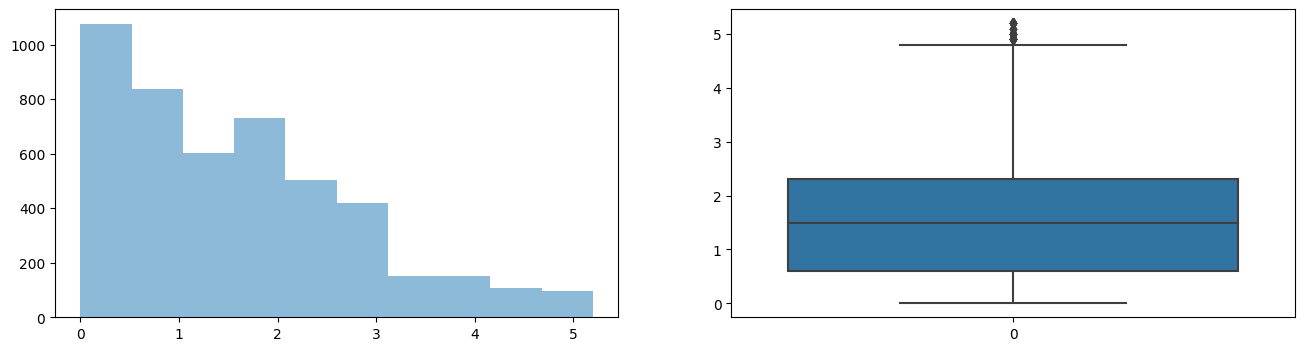

In [14]:
plotvariable(engineered_data, 'CCAvg')

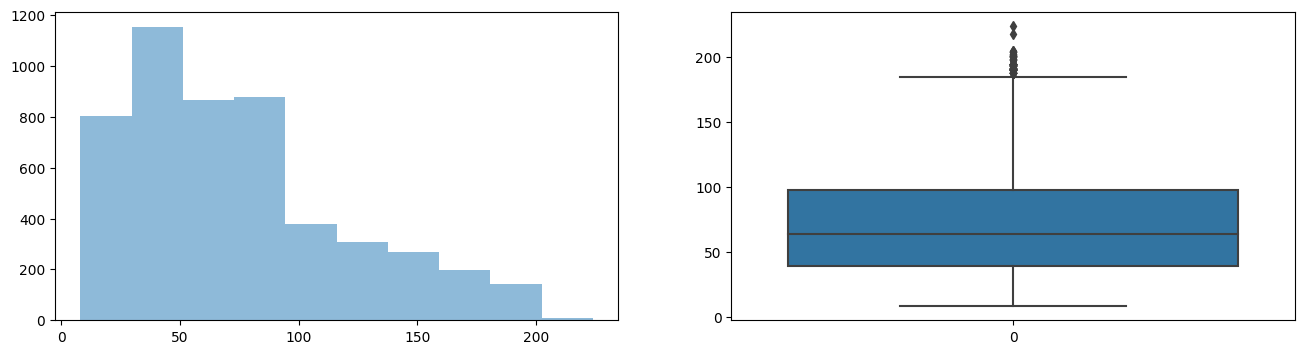

In [15]:
plotvariable(data, 'Income')

In [16]:
lower_Income, upper_Income = find_boundaries(data, 'Income')
print('upper limit for CCAvg area is', upper_Income)
print('lower limit for CCAvg area is', lower_Income)

upper limit for CCAvg area is 186.5
lower limit for CCAvg area is -49.5


# Removing / Trimming the outliers

In [17]:
outliers_Income = np.where(data['Income'] > upper_Income, True ,
                         np.where(data['Income']< lower_Income, True , False))

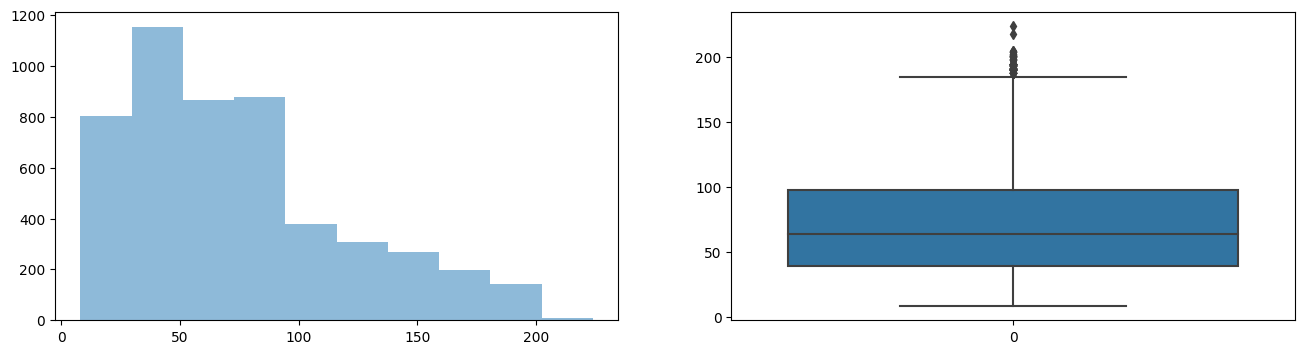

In [18]:
plotvariable(data, 'Income')